In [1]:
import os

import scanpy as sc
import pandas as pd
import numpy as np

from tqdm import tqdm
from spatial_metric import spatial_gene_autocorr, plot_compare_spatial_autocorr, get_sampeled_adata, run_cluster_plot


/home/wys/miniconda3/envs/python3.10/lib/python3.10/importlib/__init__.py:126: FutureWarning: The legacy Dask DataFrame implementation is deprecated and will be removed in a future version. Set the configuration option `dataframe.query-planning` to `True` or None to enable the new Dask Dataframe implementation and silence this warning.
  return _bootstrap._gcd_import(name[level:], package, level)
/home/wys/miniconda3/envs/python3.10/lib/python3.10/site-packages/anndata/utils.py:429: FutureWarning: Importing read_text from `anndata` is deprecated. Import anndata.io.read_text instead.
  warnings.warn(msg, FutureWarning)


In [4]:
import scanpy as sc
patient_id = "P5NAT"
# patient_id = "P5CRC"

adata = sc.read(f"/home/wys/Sim2Real-ST/REVISE_data_process/raw_data/{patient_id}_HD.h5ad")
adata.obs['Level1'].value_counts()

Level1
Intestinal Epithelial    157917
SMC                       79116
Fibroblast                59739
Plasma                    49647
Vascular EC               16262
Mono/Macro                14567
Pericyte                   9296
T                          9084
B                          8600
Tumor                      7660
Gliacyte                   7376
DC                         4895
Mast                       4123
Lymphatic EC               3978
Unknown                    3513
Name: count, dtype: int64

In [3]:
resolutions = [0.3, 0.5, 0.8]
# resolutions = [0.1, 0.3, 0.5]
patient_ids = ["P1CRC", "P2CRC", "P5CRC"]
patient_ids = ["P1CRC"]
data_type = "HD"
cell_type_col = "Level1"

sample_size = 30000

raw_data_path = "/home/wys/Sim2Real-ST/REVISE_data_process/raw_data"
svc_data_path = "../REVISE/results/HD"
save_dir = "output/sp_SVC_case"


Processing patients:   0%|          | 0/1 [00:00<?, ?it/s]

Processing SVC data for P1CRC_HD
Sampling 30000 cells from 507684 total cells.
Level1
Tumor                    8493
Fibroblast               6275
Intestinal Epithelial    3786
Mono/Macro               2316
SMC                      2277
Plasma                   1884
Vascular EC              1063
T                         885
DC                        871
B                         692
Pericyte                  672
Lymphatic EC              302
Gliacyte                  265
Mast                      219
Name: count, dtype: int64
Highly variable genes filtering for 13497 genes.
Number of clusters for leiden resolution 0.3: 15
Number of clusters for leiden resolution 0.5: 22
Number of clusters for leiden resolution 0.8: 26
   resolution       ARI       NMI  cluster_num
0         0.3  0.990022  0.988465           15
0         0.5  0.716911  0.893918           22
0         0.8  0.591164  0.845229           26
['All', 'B', 'DC', 'Fibroblast', 'Gliacyte', 'Intestinal Epithelial', 'Lymphatic EC'

(30000, 13497)


  0%|          | 0/1 [00:00<?, ?/s]

  0%|          | 0/1 [00:00<?, ?/s]

All [-0.00445131  0.02152014  0.04286621  0.08528584  0.69371404]
(834, 13497)


  0%|          | 0/1 [00:00<?, ?/s]

  0%|          | 0/1 [00:00<?, ?/s]

B [-5.06267051e-02 -4.17621377e-05  1.96241458e-02  4.57057398e-02
  3.11901800e-01]
(988, 13497)


  0%|          | 0/1 [00:00<?, ?/s]

  0%|          | 0/1 [00:00<?, ?/s]

DC [-0.04750257 -0.00157964  0.01498223  0.03598987  0.35106973]
(6535, 13497)


  0%|          | 0/1 [00:00<?, ?/s]

  0%|          | 0/1 [00:00<?, ?/s]

Fibroblast [-0.01458158  0.00775183  0.01625425  0.02738651  0.44804586]
(239, 13497)


  0%|          | 0/1 [00:00<?, ?/s]

  0%|          | 0/1 [00:00<?, ?/s]

Gliacyte [-0.1101186  -0.01922266 -0.00630252  0.01916939  0.27696099]
(4095, 13497)


  0%|          | 0/1 [00:00<?, ?/s]

  0%|          | 0/1 [00:00<?, ?/s]

Intestinal Epithelial [-0.02320489  0.00528631  0.01608781  0.03048809  0.61240304]
(261, 13497)


  0%|          | 0/1 [00:00<?, ?/s]

  0%|          | 0/1 [00:00<?, ?/s]

Lymphatic EC [-0.08605663 -0.01446656  0.00073724  0.02908348  0.20978264]
(253, 13497)


  0%|          | 0/1 [00:00<?, ?/s]

  0%|          | 0/1 [00:00<?, ?/s]

Mast [-0.08961577 -0.02044651 -0.0077637   0.01434766  0.29029774]
(1588, 13497)


  0%|          | 0/1 [00:00<?, ?/s]

  0%|          | 0/1 [00:00<?, ?/s]

Mono_Macro [-0.03554189 -0.00087446  0.01034722  0.02319156  0.25526133]
(662, 13497)


  0%|          | 0/1 [00:00<?, ?/s]

  0%|          | 0/1 [00:00<?, ?/s]

Pericyte [-0.06518948 -0.00843151  0.00437996  0.02090246  0.28720262]
(2651, 13497)


  0%|          | 0/1 [00:00<?, ?/s]

  0%|          | 0/1 [00:00<?, ?/s]

Plasma [-0.028909    0.00224337  0.0114018   0.02195243  0.40274818]
(2227, 13497)


  0%|          | 0/1 [00:00<?, ?/s]

  0%|          | 0/1 [00:00<?, ?/s]

SMC [-2.99591637e-02 -3.89426515e-05  1.13018280e-02  2.42037957e-02
  2.43504214e-01]
(616, 13497)


  0%|          | 0/1 [00:00<?, ?/s]

  0%|          | 0/1 [00:00<?, ?/s]

T [-0.06962275 -0.00917612  0.0036206   0.02177545  0.20483213]
(8210, 13497)


  0%|          | 0/1 [00:00<?, ?/s]

  0%|          | 0/1 [00:00<?, ?/s]

Tumor [-0.02060105  0.00258511  0.00889487  0.01710447  0.43234263]
(841, 13497)


  0%|          | 0/1 [00:00<?, ?/s]

  0%|          | 0/1 [00:00<?, ?/s]

Spatial autocorrelation: 100%|██████████| 15/15 [03:36<00:00, 14.44s/it]

Vascular EC [-0.0500352  -0.00592047  0.00599112  0.02173463  0.24514561]



Processing patients: 100%|██████████| 1/1 [07:04<00:00, 424.85s/it]


<Figure size 1000x1000 with 0 Axes>

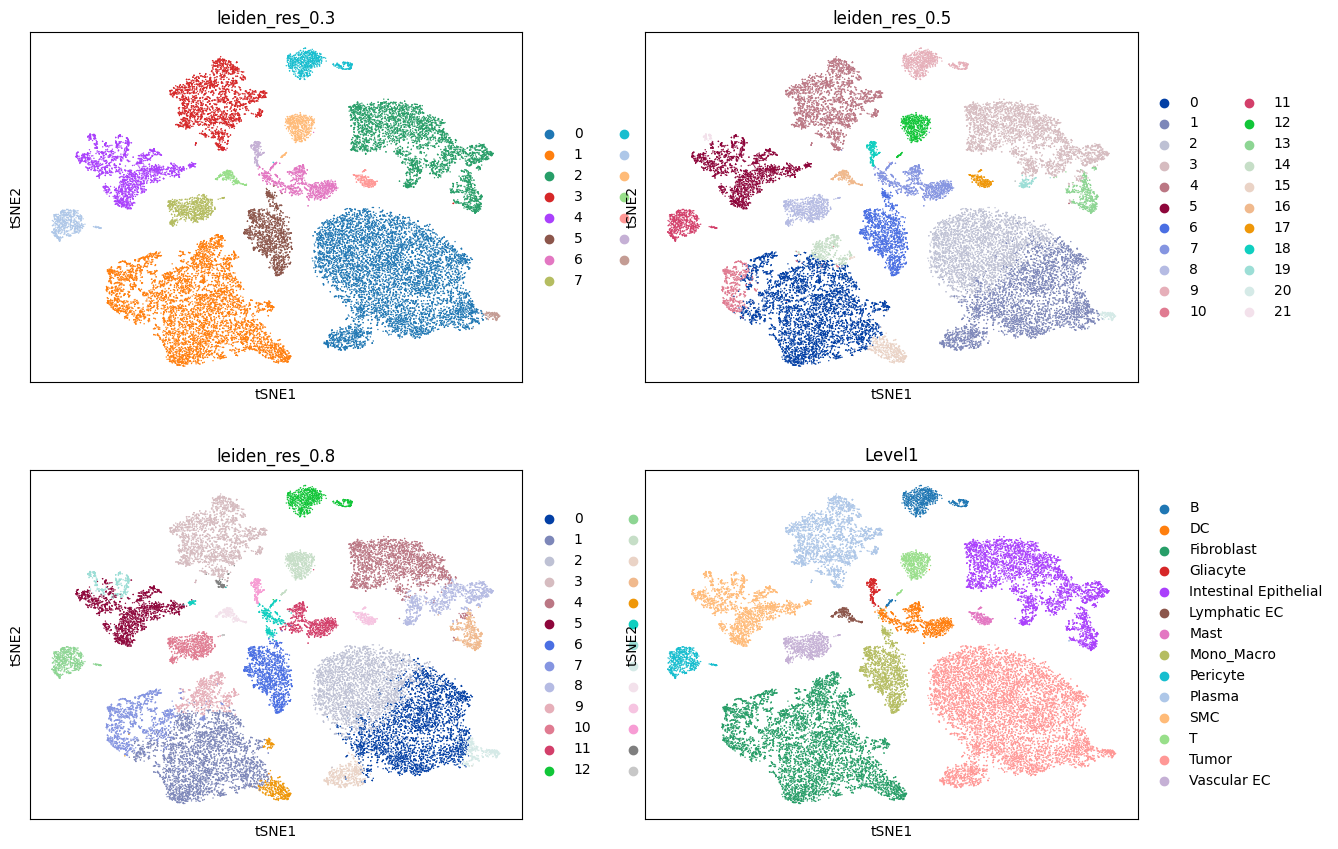

<Figure size 1000x1000 with 0 Axes>

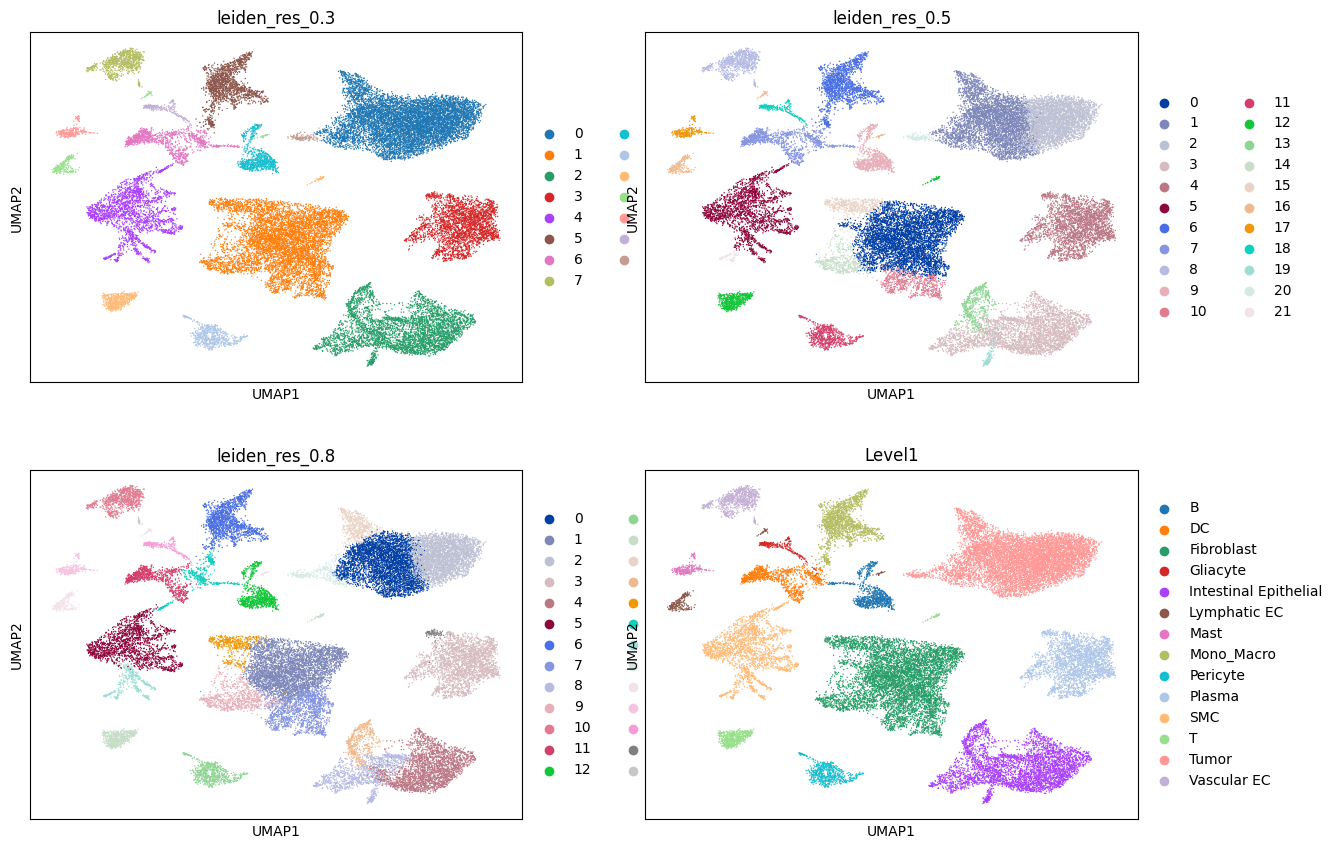

<Figure size 1000x1000 with 0 Axes>

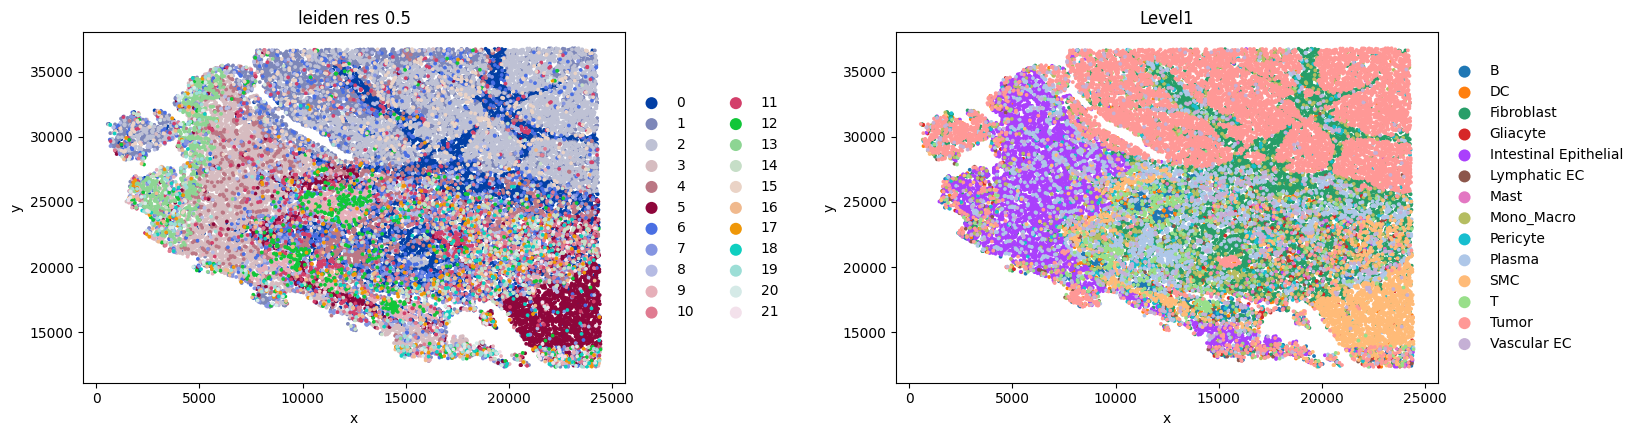

<Figure size 800x600 with 0 Axes>

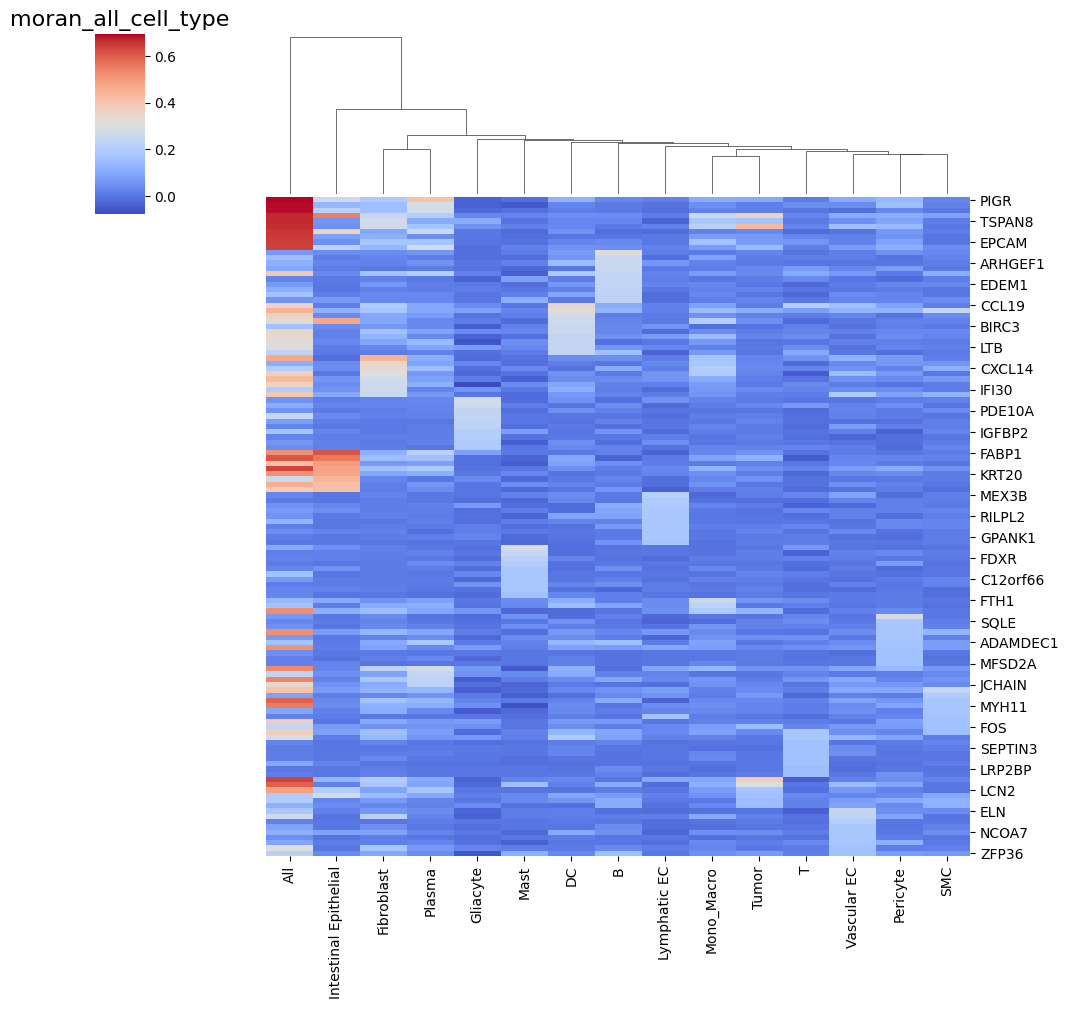

<Figure size 800x600 with 0 Axes>

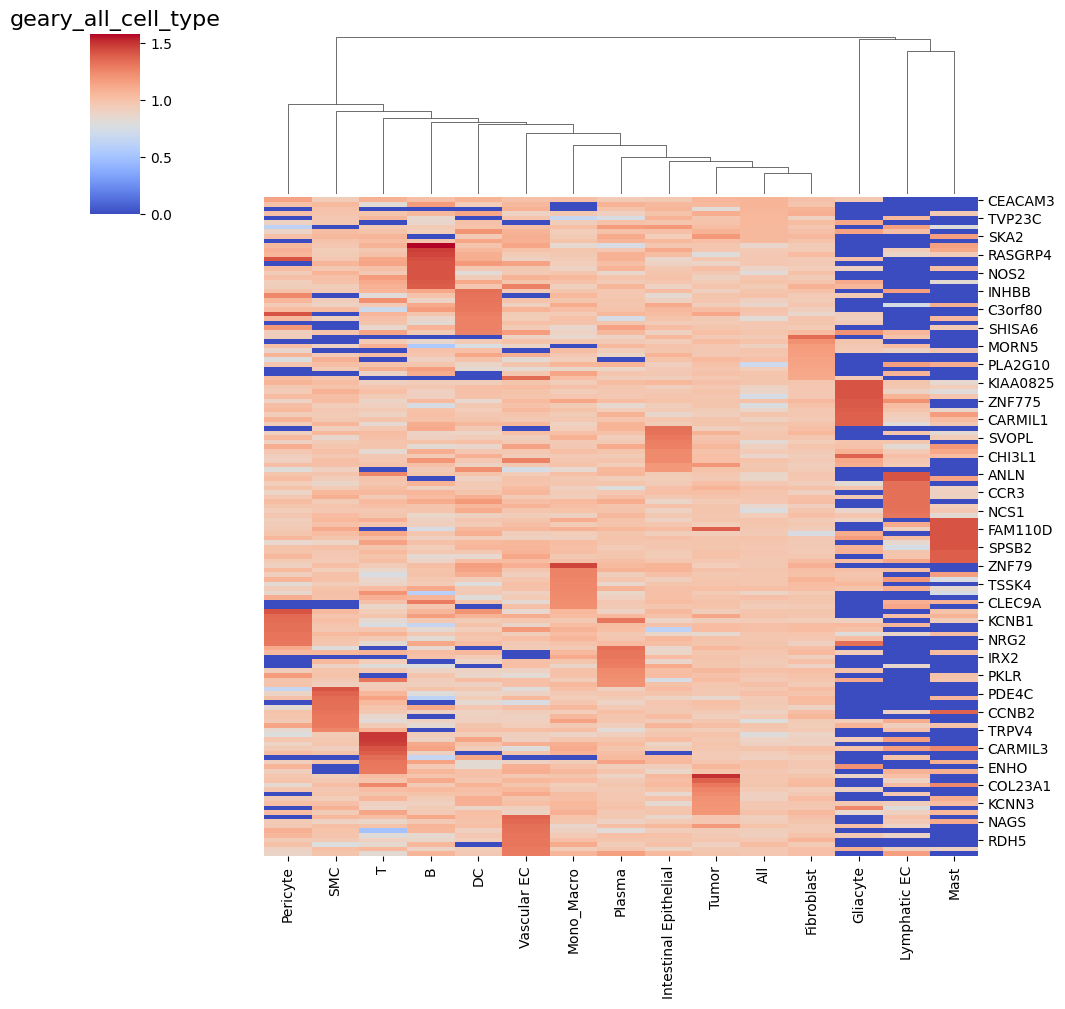

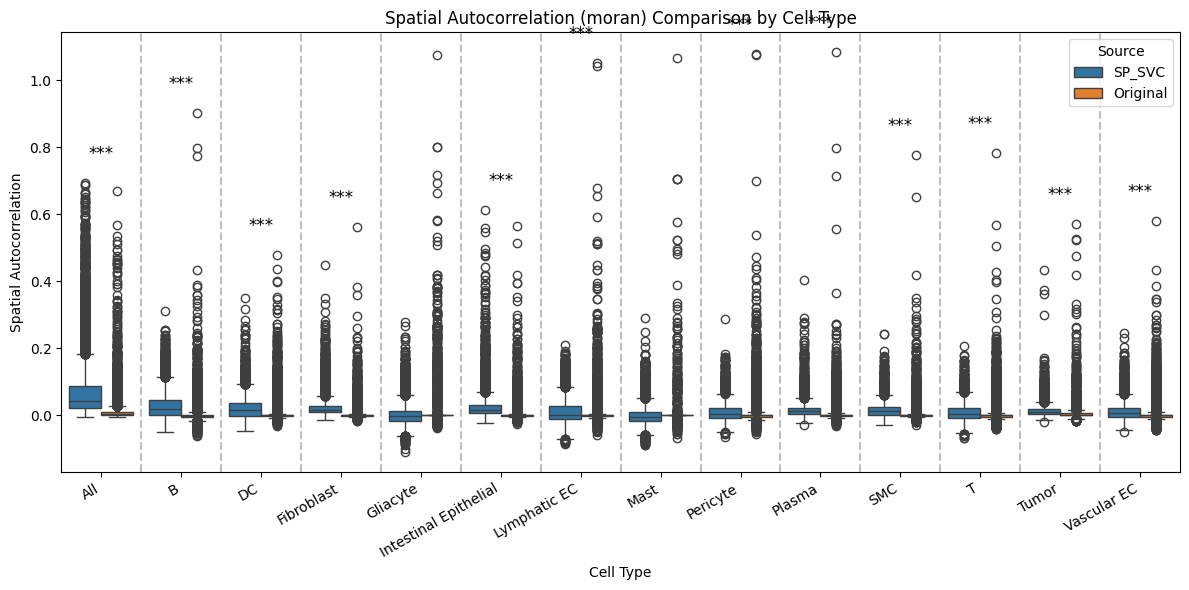

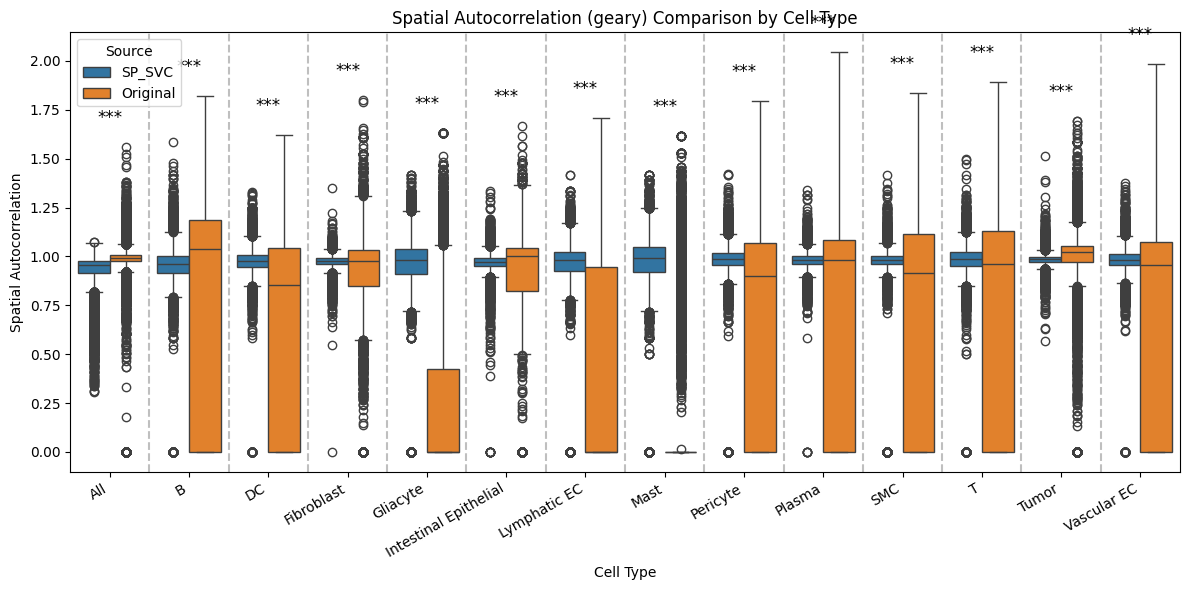

In [18]:
for patient_id in tqdm(patient_ids, desc="Processing patients"):
            
    # save_path = f"{save_dir}/{patient_id}_{data_type}"
    # os.makedirs(save_path, exist_ok=True)


    # print(f"Processing original data for {patient_id}_{data_type}")
    # adata_sp = sc.read(f"{raw_data_path}/{patient_id}_{data_type}.h5ad")
    # adata_sp = adata_sp[adata_sp.obs[cell_type_col] != "Unknown"].copy()

    # if sample_size is not None:
    #     adata_sp = get_sampeled_adata(adata_sp, sample_size=sample_size, seed=0)
    #     print(adata_sp.obs[cell_type_col].value_counts())

    # run_cluster_plot(adata_sp, f"{save_path}/original", 
    #                     resolutions = resolutions, 
    #                     cell_type_col = "Level1") 
    # moranI_sp, gearyC_sp, _, _ = spatial_gene_autocorr(adata_sp, cell_type_col = "Level1", save_dir = f"{save_path}/original")
    

    print(f"Processing SVC data for {patient_id}_{data_type}")
    adata_sp_svc = sc.read(f"{svc_data_path}/{patient_id}/{patient_id}_{data_type}_pot_REVISE.h5ad")
    adata_sp_svc.X = adata_sp_svc.layers["ot_smooth"]
    # adata_sp_svc.X.data = np.round(adata_sp_svc.X.data, decimals=0)
    # adata_sp_svc.X.data = np.floor(adata_sp_svc.X.data)

    adata_sp_svc = adata_sp_svc[adata_sp_svc.obs[cell_type_col]!= "Unknown"].copy()
    
    if sample_size is not None:
        adata_sp_svc = get_sampeled_adata(adata_sp_svc, sample_size=sample_size, seed=0)
        print(adata_sp.obs[cell_type_col].value_counts())

    run_cluster_plot(adata_sp_svc, f"{save_path}/sp_SVC", 
                        resolutions = resolutions,
                        cell_type_col = "Level1")
    moranI_sp_svc, gearyC_sp_svc, _, _ = spatial_gene_autocorr(adata_sp_svc, cell_type_col = "Level1", 
                                                                save_dir = f"{save_path}/sp_SVC")
    
    plot_compare_spatial_autocorr(moranI_sp_svc, moranI_sp, save_dir = save_path, mode = "moran")
    plot_compare_spatial_autocorr(gearyC_sp_svc, gearyC_sp, save_dir = save_path, mode = "geary")

In [10]:
patient_id = patient_ids[0]
print(patient_id)
adata_sp_svc = sc.read(f"{svc_data_path}/{patient_id}/{patient_id}_{data_type}_pot_REVISE.h5ad")

P1CRC


In [11]:
adata_sp_svc.X.sum(axis=0)

matrix([[ 412., 1860.,  774., ...,  455., 6703.,  238.]], dtype=float32)

In [12]:
adata_sp_svc.layers["ot_smooth"].sum(axis=0)

matrix([[ 386.98772585, 1812.20341877,  747.26215468, ...,  441.72915582,
         8067.44810448,  226.41562169]])

## Plot summary

In [15]:
import pandas as pd

from tqdm import tqdm

patient_ids = ["P1CRC", "P2CRC", "P5CRC", "P3NAT","P5NAT"]
metrics = ["ARI", "NMI"]
data_type = "HD"
cell_type_col = "Level1"


In [21]:
# 创建一个空的DataFrame来存储所有数据
all_metric_dfs = []

for patient_id in tqdm(patient_ids):
    # 读取原始数据
    original_metric_df = pd.read_csv(f"output/sp_SVC_case/{patient_id}_{data_type}/original/metric.csv")
    select_res = original_metric_df.loc[original_metric_df['ARI'].idxmax(), "resolution"]
    print(patient_id, select_res)
    
    original_metric_df = original_metric_df[original_metric_df['resolution'] == select_res]
    original_metric_df['data_class'] = "Original"

    # 读取sp_SVC数据
    sp_SVC_metric_df = pd.read_csv(f"output/sp_SVC_case/{patient_id}_{data_type}/sp_SVC/metric.csv")
    sp_SVC_metric_df = sp_SVC_metric_df[sp_SVC_metric_df['resolution'] == select_res]
    sp_SVC_metric_df['data_class'] = "sp_SVC"
    
    # 合并数据并添加patient_id
    metric_df = pd.concat([original_metric_df, sp_SVC_metric_df], axis=0)
    metric_df['patient_id'] = patient_id
    
    # 添加到总数据列表
    all_metric_dfs.append(metric_df)

# 合并所有patient的数据
final_metric_df = pd.concat(all_metric_dfs, axis=0)


100%|██████████| 5/5 [00:00<00:00, 197.32it/s]

P1CRC 0.5
P2CRC 0.3
P5CRC 0.5
P3NAT 0.3
P5NAT 0.3


In [19]:
# select_metric = metrics[0]
# print(select_metric)

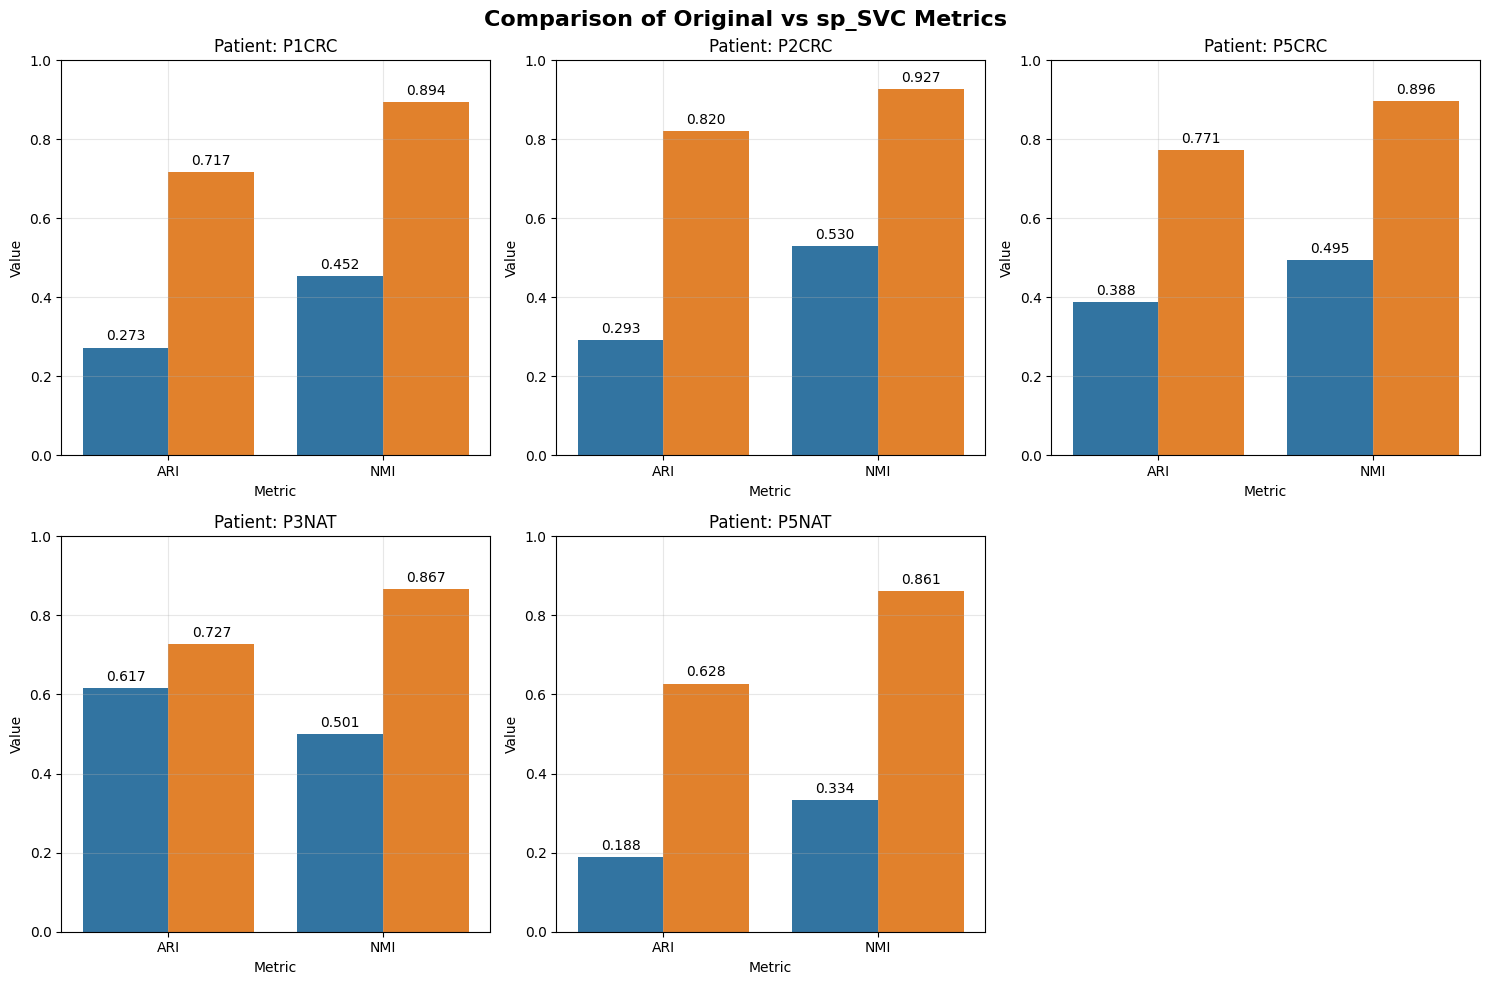

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Comparison of Original vs sp_SVC Metrics', fontsize=16, fontweight='bold')

# 将axes展平以便于迭代
axes = axes.flatten()

# 为每个patient_id创建子图
for i, patient_id in enumerate(patient_ids):
    patient_data = final_metric_df[final_metric_df['patient_id'] == patient_id]
    
    # 准备绘图数据
    plot_data = []
    for metric in metrics:
        for data_class in ["Original", "sp_SVC"]:
            value = patient_data[patient_data['data_class'] == data_class][metric].values[0]
            plot_data.append({
                'Metric': metric,
                'Value': value,
                'Data Class': data_class
            })
    
    plot_df = pd.DataFrame(plot_data)
    
    # 绘制柱状图
    ax = axes[i]
    bars = sns.barplot(data=plot_df, x='Metric', y='Value', hue='Data Class', ax=ax, legend=False)
    ax.set_title(f'Patient: {patient_id}')
    ax.set_ylim(0, 1)  # 假设指标范围是0-1
    ax.grid(True, alpha=0.3)
    
    # 在每个柱子上添加数值标签
    for container in bars.containers:
        bars.bar_label(container, fmt='%.3f', padding=3)

# 在最后一个位置（第6个子图）添加图例
axes[5].set_visible(False)  # 隐藏第6个子图的坐标轴

plt.tight_layout()
plt.subplots_adjust(top=0.93)  # 为总标题留出空间

plt.savefig('output/sp_SVC_case/metrics_comparison.pdf', dpi=300, bbox_inches='tight')
plt.show()
